In [47]:
import pandas
import pandasql
import matplotlib.pyplot as plt

In [ ]:
# make interface easy and easy to understand

In [33]:
data = [
    {'age': 21, 'occupation': 'cashier', 'points': 12 },
    {'age': 24, 'occupation': 'cashier', 'points': 32 },
    {'age': 43, 'occupation': 'cashier', 'points': 1 },
    {'age': 34, 'occupation': 'cashier', 'points': 25 },
    {'age': 27, 'occupation': 'programmer', 'points': 24 },
    {'age': 52, 'occupation': 'programmer', 'points': 17 },
    {'age': 18, 'occupation': 'programmer', 'points': 73 },
    {'age': 31, 'occupation': 'programmer', 'points': 31 },
]

df = pandas.DataFrame(data)
df.head()

,age,occupation,points
0,21,cashier,12
1,24,cashier,32
2,43,cashier,1
3,34,cashier,25
4,27,programmer,24


In [39]:
query = """
SELECT 
    age as 'x',
    points as 'y',
    occupation as 'hue',
    'age' as 'xlabel',
    'points' as 'ylabel',
    'scatterplot' as plottype
FROM
    df
"""

In [40]:
res = pandasql.sqldf(query, locals())
res.head()

,x,y,group,xlabel,ylabel,plottype
0,21,12,cashier,age,points,scatterplot
1,24,32,cashier,age,points,scatterplot
2,43,1,cashier,age,points,scatterplot
3,34,25,cashier,age,points,scatterplot
4,27,24,programmer,age,points,scatterplot


In [ ]:
# try SNS automatic
query = """
SELECT 
    age as 'x',
    points as 'y',
    occupation as 'hue',
    'age' as 'plt.xlabel',
    'points' as 'plt.ylabel',
    'scatterplot' as 'plottype',
FROM
    df
"""

res = pandasql.sqldf(query, locals())
res.head()

class PlotterGen:
    def Plotter(self, df):
        self.df = df

    def show(self):
#         call all sns relevant plots
#         then, call all relevant plt methods that are left
#         getattr()
#         call all plt functions
        
plotter = Plotter(res)
plotter.show()

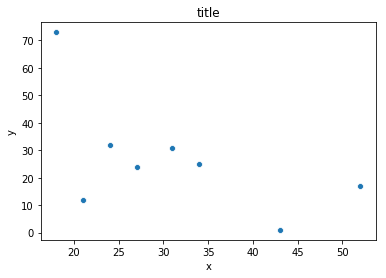

In [50]:
class Plotter:
    def __init__(self, df):
        self.df = df

    def __boxplot(self):
        pass
        
    def show(self):
        # plot type
        if len(self.df['plottype'].unique())  > 1: 
            raise 
        else:
            plottype = self.df['plottype'].unique()[0]

        if len(self.df['xlabel'].unique())  > 1: 
            raise 
        else:
            xlabel = self.df['xlabel'].unique()[0]

        if len(self.df['ylabel'].unique())  > 1: 
            raise 
        else:
            ylabel = self.df['ylabel'].unique()[0]

        # groups | group column 
        if 'group' in self.df:
            groups = True
        else:
            groups = False
        
        if plottype == 'boxplot':
            x = []
            labels = []
            
            for name, group in res.groupby("group"):
                labels.append(name)
                x.append(group['x'].values)

            matplotlib.pyplot.boxplot(x, labels=labels)
            
            matplotlib.pyplot.show()

        elif plottype == 'scatter':
            for name, group in self.df.groupby('group'):
                matplotlib.pyplot.scatter(group['x'], group['y'], label=name)
                
            matplotlib.pyplot.xlabel(xlabel)
            matplotlib.pyplot.ylabel(ylabel)
            matplotlib.pyplot.legend()
            matplotlib.pyplot.show()

        else:
            raise
            
    
    ## plots for continuous data
    def plot1(self):
        if len(self.df['plottype'].unique())  > 1: 
            raise 
        else:
            plottype = self.df['plottype'].unique()[0]
        getattr(sns, plottype)(x='x', y='y', data=self.df)
        plt.title("title")
#         plt.xlabel("xlabel")
#         plt.ylabel("ylabel")
        
plotter = Plotter(res)
plotter.plot1()

In [13]:
matplotlib.pyplot.scatter.__code__.co_varnames


('x',
 'y',
 's',
 'c',
 'marker',
 'cmap',
 'norm',
 'vmin',
 'vmax',
 'alpha',
 'linewidths',
 'verts',
 'edgecolors',
 'data',
 'kwargs',
 '__ret')

In [29]:
query = """
SELECT 
    age as 'x',
    points as 'y',
    occupation as 'group',
    'age' as 'xlabel',
    'points' as 'ylabel',
    'matplotlib.pyplot.plot' as 'plottype'
FROM
    df
"""

res = pandasql.sqldf(query, locals())
res.head()

if len(res['plottype'].unique())  > 1: 
    raise 
else:
    plottype = res['plottype'].unique()[0]

reserved = {'group', 'xlabel', 'ylabel', 'plottype'}
lackforbettername = set(res.columns).difference(reserved)
# intersection = set(matplotlib.pyplot.plot.__code__.co_varnames).intersection(set(res.columns))
# d = { k:res[k] for k in intersection }
d = { k:res[k] for k in lackforbettername }

# eval(plottype)(**d)
d

{'x': 0    21
 1    24
 2    43
 3    34
 4    27
 5    52
 6    18
 7    31
 Name: x, dtype: int64, 'y': 0    12
 1    32
 2     1
 3    25
 4    24
 5    17
 6    73
 7    31
 Name: y, dtype: int64}

In [30]:
import seaborn as sns
sns.jointplot

<function seaborn.axisgrid.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)>

In [51]:
import inspect

In [52]:
inspect.getmembers(plt)

/Users/jspenger/miniconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/jspenger/miniconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/jspenger/miniconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


[('Annotation', matplotlib.text.Annotation),
 ('Arrow', matplotlib.patches.Arrow),
 ('Artist', matplotlib.artist.Artist),
 ('AutoLocator', matplotlib.ticker.AutoLocator),
 ('Axes', matplotlib.axes._axes.Axes),
 ('Button', matplotlib.widgets.Button),
 ('Circle', matplotlib.patches.Circle),
 ('Figure', matplotlib.figure.Figure),
 ('FigureCanvasBase', matplotlib.backend_bases.FigureCanvasBase),
 ('FixedFormatter', matplotlib.ticker.FixedFormatter),
 ('FixedLocator', matplotlib.ticker.FixedLocator),
 ('FormatStrFormatter', matplotlib.ticker.FormatStrFormatter),
 ('Formatter', matplotlib.ticker.Formatter),
 ('FuncFormatter', matplotlib.ticker.FuncFormatter),
 ('GridSpec', matplotlib.gridspec.GridSpec),
 ('IndexLocator', matplotlib.ticker.IndexLocator),
 ('Line2D', matplotlib.lines.Line2D),
 ('LinearLocator', matplotlib.ticker.LinearLocator),
 ('Locator', matplotlib.ticker.Locator),
 ('LogFormatter', matplotlib.ticker.LogFormatter),
 ('LogFormatterExponent', matplotlib.ticker.LogFormatterExp

In [53]:
'xlabel' in inspect.getmembers(plt)

False

In [55]:
'xlabel' in dir(plt)

True

In [60]:
set(dir(plt)).intersection(dir(sns))

{'__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'boxplot',
 'cm',
 'violinplot'}